# OpenSim Parser Demo - Clean Start 🚀

This is a clean demonstration of our modular OpenSim parser architecture. We'll walk through using the existing parser step by step.

## 🎯 What We'll Do
1. **Import** the parser components
2. **Load** an OpenSim model (.osim file)
3. **Load** motion data (.mot file) 
4. **Validate** model-motion compatibility
5. **Convert** to graph neural network format
6. **Export** results

## 🏗️ Parser Architecture
- **OpenSimModelParser**: Handles .osim model files
- **OpenSimMotionParser**: Handles .mot motion files
- **OpenSimParser**: Unified interface combining both

Let's get started!

## 1. Import Libraries and Setup

In [21]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
warnings.filterwarnings('ignore')

# Add project root to path
project_root = Path('..').resolve()
sys.path.insert(0, str(project_root))

# Import our OpenSim parser components
from graphmechanics.utils.opensim_parser import (
    OpenSimParser, 
    OpenSimModelParser, 
    OpenSimMotionParser
)

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Libraries imported successfully!")
print(f"📁 Project root: {project_root}")

# Find test data - use Data directory which has .mot files
test_dir = project_root / "experiments" / "motion_prediction_exp_20250803_200025"
data_dir = project_root / "Data" / "OpenCapData_7272a71a-e70a-4794-a253-39e11cb7542c"

osim_files = list(test_dir.glob("*.osim"))
mot_files = list(data_dir.rglob("*.mot"))

print(f"\n🎯 Test data found:")
print(f"📄 .osim files: {len(osim_files)} (from experiments)")  
print(f"📈 .mot files: {len(mot_files)} (from OpenCap data)")

# Select test files
test_osim = str(osim_files[0]) if osim_files else None
test_mot = str(mot_files[0]) if mot_files else None

print(f"\n📋 Selected for demo:")
if test_osim:
    print(f"   Model: {Path(test_osim).name}")
if test_mot:  
    print(f"   Motion: {Path(test_mot).name}")

✅ Libraries imported successfully!
📁 Project root: /home/funsega/GraphMechanics

🎯 Test data found:
📄 .osim files: 1 (from experiments)
📈 .mot files: 5 (from OpenCap data)

📋 Selected for demo:
   Model: LaiUhlrich2022_scaled.osim
   Motion: run.mot


## 2. Parse OpenSim Model (.osim file)

In [14]:
if test_osim:
    print("🔄 Loading OpenSim Model...")
    
    # Create model parser
    model_parser = OpenSimModelParser(test_osim)
    
    print(f"✅ Model loaded successfully!")
    print(f"🏷️  Name: {model_parser.model_name}")
    print(f"📏 Units: {model_parser.length_units} (length), {model_parser.force_units} (force)")
    
    print(f"\n📊 Model Components:")
    print(f"   🦴 Bodies: {len(model_parser.bodies)}")
    print(f"   🔗 Joints: {len(model_parser.joints)}")  
    print(f"   📐 Coordinates: {len(model_parser.coordinates)}")
    print(f"   💪 Muscles: {len(model_parser.muscles)}")
    
    # Show some details
    print(f"\n📐 Sample Coordinates (first 5):")
    coord_names = list(model_parser.coordinates.keys())[:5]
    for name in coord_names:
        coord = model_parser.coordinates[name]
        print(f"   • {name}: {coord.motion_type}")
        
    print(f"\n🔗 Sample Joints (first 3):")
    joint_names = list(model_parser.joints.keys())[:3]
    for name in joint_names:
        joint = model_parser.joints[name]
        dof = len(joint.coordinates) if hasattr(joint, 'coordinates') else 0
        print(f"   • {name}: {joint.parent_body} → {joint.child_body} ({dof} DOF)")
        
else:
    print("❌ No .osim file found for demonstration")
    model_parser = None

🔄 Loading OpenSim Model...
Successfully parsed OpenSim model: LaiUhlrich2022_scaled
  Bodies: 22
  Joints: 22
  Coordinates: 35
  Muscles: 80
✅ Model loaded successfully!
🏷️  Name: LaiUhlrich2022_scaled
📏 Units: meters (length), N (force)

📊 Model Components:
   🦴 Bodies: 22
   🔗 Joints: 22
   📐 Coordinates: 35
   💪 Muscles: 80

📐 Sample Coordinates (first 5):
   • ankle_angle_r: rotational
   • subtalar_angle_r: rotational
   • mtp_angle_r: rotational
   • ankle_angle_l: rotational
   • subtalar_angle_l: rotational

🔗 Sample Joints (first 3):
   • ankle_r: tibia_r_offset → talus_r_offset (1 DOF)
   • subtalar_r: talus_r_offset → calcn_r_offset (1 DOF)
   • mtp_r: calcn_r_offset → toes_r_offset (1 DOF)


## 3. Parse Motion Data (.mot file)

In [15]:
if test_mot:
    print("🔄 Loading Motion Data...")
    
    # Create motion parser
    motion_parser = OpenSimMotionParser(test_mot)
    
    print(f"✅ Motion data loaded successfully!")
    print(f"📊 Dimensions: {motion_parser.n_rows} rows × {motion_parser.n_columns} columns")
    print(f"⏱️  Duration: {motion_parser.get_duration():.2f} seconds")
    print(f"🌡️  Units: {'degrees' if motion_parser.in_degrees else 'radians'}")
    
    # Data quality check
    quality = motion_parser.data_quality
    print(f"\n📈 Data Quality:")
    print(f"   ✅ Completeness: {quality['completeness_percent']:.1f}%")
    print(f"   📊 Total Frames: {quality['total_frames']}")
    print(f"   📡 Sampling Rate: {quality.get('sampling_rate', 0):.1f} Hz")
    
    # Show coordinate names
    print(f"\n📐 Coordinates (first 8):")
    coord_names = motion_parser.coordinate_names[:8]
    for i, name in enumerate(coord_names, 1):
        print(f"   {i:2d}. {name}")
    
    if len(motion_parser.coordinate_names) > 8:
        remaining = len(motion_parser.coordinate_names) - 8
        print(f"   ... and {remaining} more coordinates")
        
else:
    print("❌ No .mot file found for demonstration")
    motion_parser = None

🔄 Loading Motion Data...
Successfully parsed motion file: run.mot
  Duration: 1.55 seconds
  Frames: 94
  Coordinates: 34
  Units: degrees (rotational)
✅ Motion data loaded successfully!
📊 Dimensions: 94 rows × 34 columns
⏱️  Duration: 1.55 seconds
🌡️  Units: degrees

📈 Data Quality:
   ✅ Completeness: 100.0%
   📊 Total Frames: 94
   📡 Sampling Rate: 60.0 Hz

📐 Coordinates (first 8):
    1. time
    2. pelvis_tilt
    3. pelvis_list
    4. pelvis_rotation
    5. pelvis_tx
    6. pelvis_ty
    7. pelvis_tz
    8. hip_flexion_r
   ... and 26 more coordinates


## 4. Unified Parser & Compatibility Check

In [16]:
if test_osim and test_mot:
    print("🔄 Creating Unified Parser...")
    
    # Create unified parser
    unified_parser = OpenSimParser(test_osim, test_mot)
    
    print("🔍 Checking Model-Motion Compatibility...")
    
    # Validate compatibility
    compatibility = unified_parser.validate_model_motion_compatibility()
    
    print(f"\n📊 Compatibility Results:")
    print(f"   ✅ Compatible: {compatibility['compatible']}")
    print(f"   📊 Score: {compatibility['compatibility_score']:.1%}")
    print(f"   🎯 Common Coordinates: {len(compatibility['common_coordinates'])}")
    print(f"   📈 Model Coordinates: {compatibility['total_model_coords']}")
    print(f"   📉 Motion Coordinates: {compatibility['total_motion_coords']}")
    
    # Show some common coordinates
    if compatibility['common_coordinates']:
        print(f"\n✅ Common Coordinates (first 8):")
        for coord in compatibility['common_coordinates'][:8]:
            print(f"   • {coord}")
        
        if len(compatibility['common_coordinates']) > 8:
            remaining = len(compatibility['common_coordinates']) - 8
            print(f"   ... and {remaining} more")
    
    # Show missing/extra if any
    if compatibility['missing_in_motion']:
        print(f"\n❌ Missing in Motion ({len(compatibility['missing_in_motion'])} total)")
        
    if compatibility['extra_in_motion']:
        print(f"\n➕ Extra in Motion ({len(compatibility['extra_in_motion'])} total)")
    
    # Quick visualization
    if compatibility['compatibility_score'] >= 0.8:
        print(f"\n🎉 Excellent compatibility - ready for analysis!")
    elif compatibility['compatibility_score'] >= 0.5:
        print(f"\n⚠️  Good compatibility - minor alignment needed")
    else:
        print(f"\n❌ Poor compatibility - significant misalignment")
        
else:
    print("❌ Need both .osim and .mot files for unified parsing")
    unified_parser = None

🔄 Creating Unified Parser...
Successfully parsed OpenSim model: LaiUhlrich2022_scaled
  Bodies: 22
  Joints: 22
  Coordinates: 35
  Muscles: 80
Successfully parsed motion file: run.mot
  Duration: 1.55 seconds
  Frames: 94
  Coordinates: 34
  Units: degrees (rotational)
🔍 Checking Model-Motion Compatibility...

📊 Compatibility Results:
   ✅ Compatible: True
   📊 Score: 94.3%
   🎯 Common Coordinates: 33
   📈 Model Coordinates: 35
   📉 Motion Coordinates: 33

✅ Common Coordinates (first 8):
   • pelvis_tz
   • hip_flexion_r
   • pelvis_ty
   • pro_sup_l
   • hip_adduction_r
   • lumbar_extension
   • knee_angle_r
   • hip_flexion_l
   ... and 25 more

❌ Missing in Motion (2 total)

🎉 Excellent compatibility - ready for analysis!


## 5. Convert to Graph Neural Network Format

In [17]:
if unified_parser:
    print("🔄 Converting to Graph Format...")
    
    # Convert to graph format
    graph_data = unified_parser.to_graph_format()
    
    print(f"✅ Graph format conversion complete!")
    print(f"   🏗️  Has Model: {graph_data['has_model']}")
    print(f"   📈 Has Motion: {graph_data['has_motion']}")
    
    if graph_data['has_model']:
        model_data = graph_data['model_data']
        print(f"\n🏗️  Model Graph Structure:")
        print(f"   📐 Coordinates: {len(model_data['coordinate_names'])}")
        print(f"   🔗 Joint Connections: {len(model_data['joint_connections'])}")
        print(f"   🦴 Body Hierarchy: {len(model_data['body_hierarchy'])} bodies")
        
        # Show coordinate types
        coord_types = {}
        for coord_type in model_data['coordinate_types']:
            coord_types[coord_type] = coord_types.get(coord_type, 0) + 1
        
        print(f"\n📊 Coordinate Types:")
        for coord_type, count in coord_types.items():
            print(f"   {coord_type.title()}: {count}")
    
    if graph_data['has_motion']:
        motion_data = graph_data['motion_data']
        positions = motion_data['positions']
        
        print(f"\n📈 Motion Graph Structure:")
        print(f"   📊 Shape: {positions.shape} (frames × coordinates)")
        print(f"   ⏱️  Frame Rate: {motion_data['frame_rate']:.1f} Hz")
        print(f"   🌡️  Units: {'Radians' if motion_data['in_radians'] else 'Original'}")
        
        if motion_data['time'] is not None:
            time_data = motion_data['time']
            print(f"   ⏰ Time Range: {time_data[0]:.2f}s to {time_data[-1]:.2f}s")
        
        # Show statistics
        print(f"\n📊 Data Statistics:")
        print(f"   Mean: {np.nanmean(positions):.4f}")
        print(f"   Std:  {np.nanstd(positions):.4f}")
        print(f"   Range: {np.nanmin(positions):.4f} to {np.nanmax(positions):.4f}")
        
        print(f"\n🎯 Ready for Graph Neural Network Training!")
        
else:
    print("❌ No unified parser available for graph conversion")

🔄 Converting to Graph Format...
✅ Graph format conversion complete!
   🏗️  Has Model: True
   📈 Has Motion: True

🏗️  Model Graph Structure:
   📐 Coordinates: 35
   🔗 Joint Connections: 35
   🦴 Body Hierarchy: 17 bodies

📊 Coordinate Types:
   Rotational: 32
   Translational: 3

📈 Motion Graph Structure:
   📊 Shape: (94, 33) (frames × coordinates)
   ⏱️  Frame Rate: 60.0 Hz
   🌡️  Units: Radians
   ⏰ Time Range: 0.00s to 1.55s

📊 Data Statistics:
   Mean: 0.1994
   Std:  0.9197
   Range: -4.8541 to 2.4691

🎯 Ready for Graph Neural Network Training!


## 6. Visualize Results

📈 Creating Motion Visualizations...


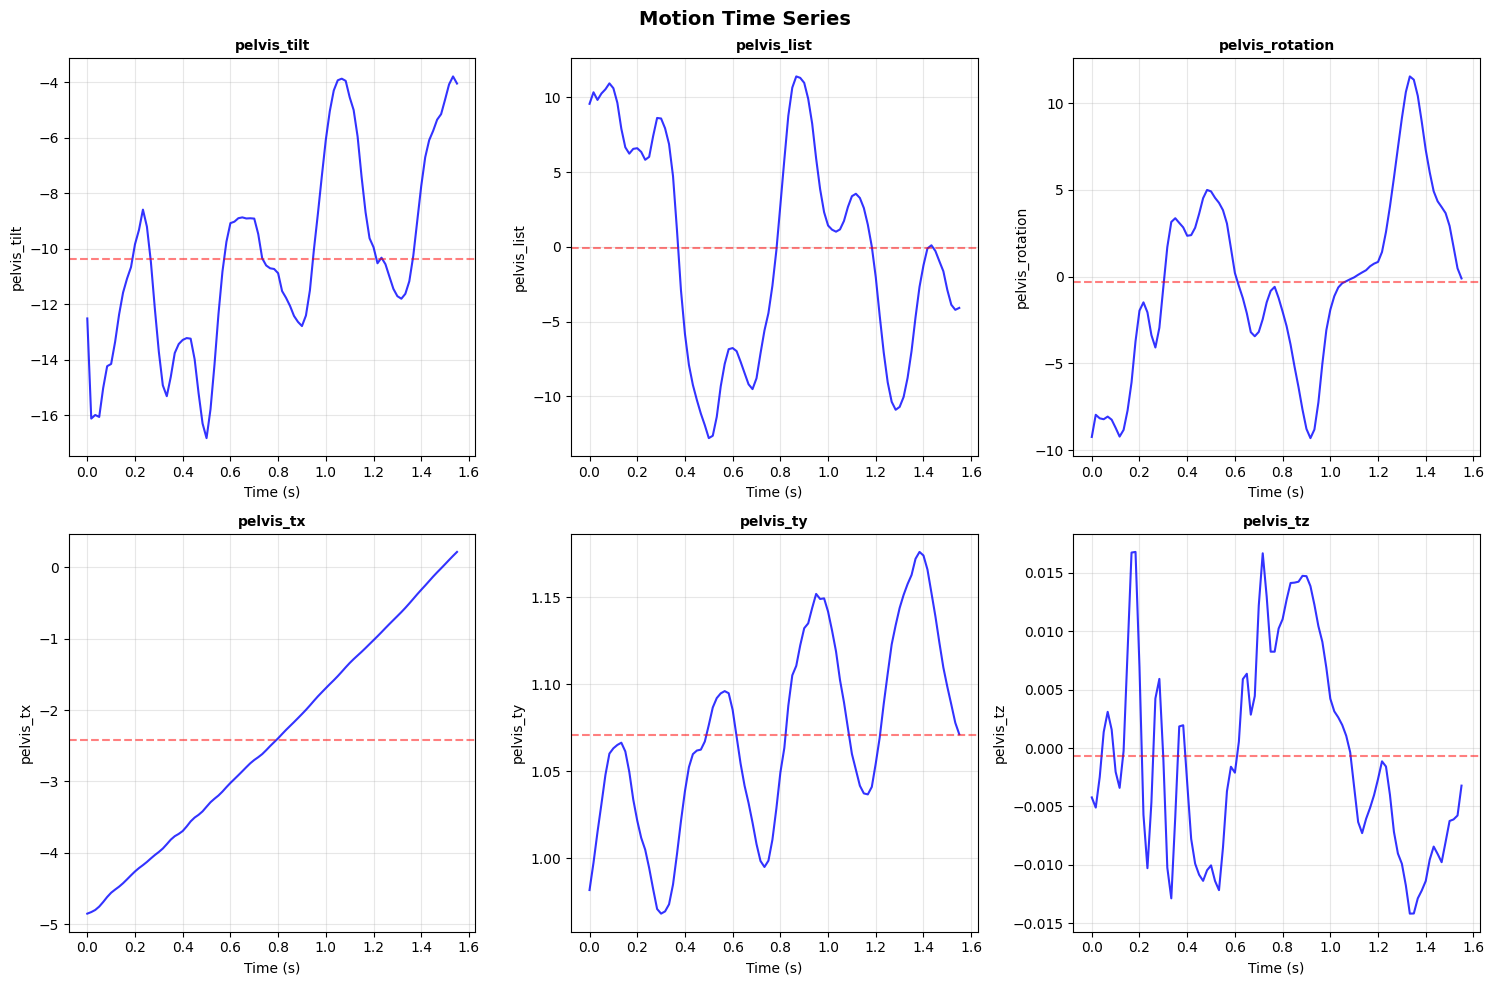

✅ Motion plots created for 6 coordinates

🏗️ Creating Model Structure Visualization...


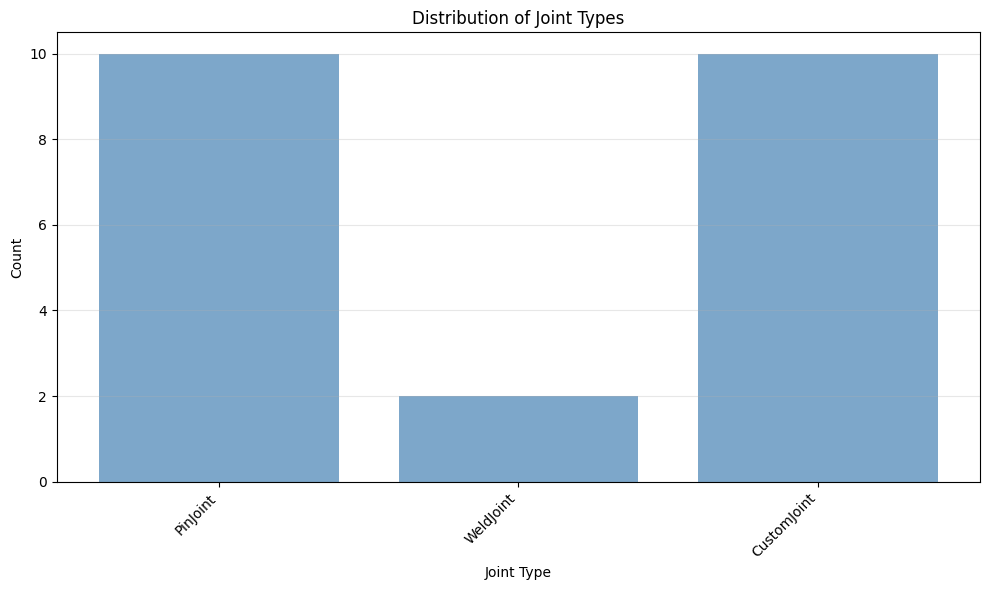

✅ Joint distribution plot created (3 types)

📊 Creating Compatibility Visualization...


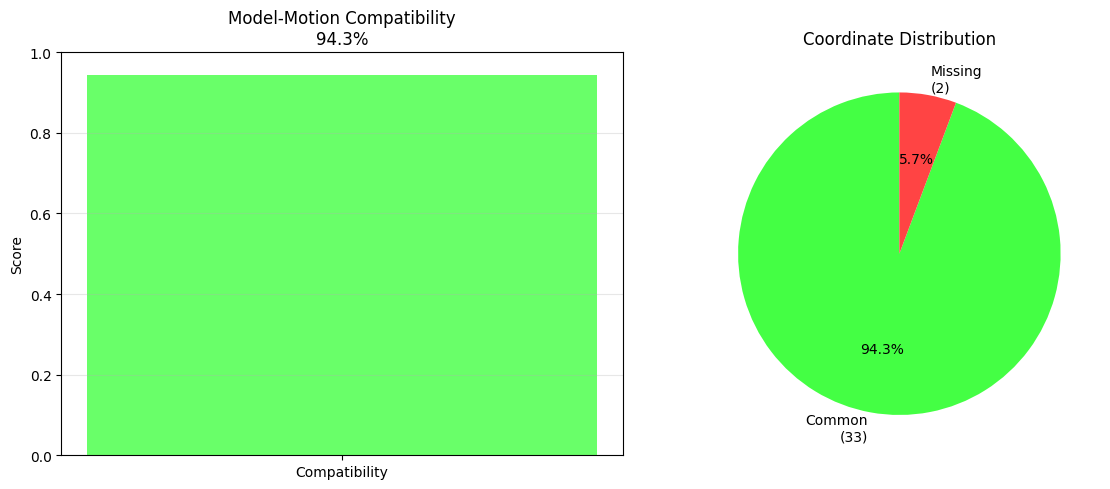

✅ Compatibility visualization created


In [18]:
if motion_parser and motion_parser.data is not None:
    print("📈 Creating Motion Visualizations...")
    
    # Plot time series for key coordinates
    motion_data = motion_parser.data
    
    # Select interesting coordinates
    coord_names = motion_parser.coordinate_names
    coords_to_plot = [coord for coord in coord_names if coord.lower() != 'time'][:6]
    
    if coords_to_plot and 'time' in motion_data.columns:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()
        
        time_col = motion_data['time']
        
        for i, coord_name in enumerate(coords_to_plot):
            if coord_name in motion_data.columns:
                coord_data = motion_data[coord_name]
                
                axes[i].plot(time_col, coord_data, 'b-', linewidth=1.5, alpha=0.8)
                axes[i].set_xlabel('Time (s)')
                axes[i].set_ylabel(coord_name)
                axes[i].set_title(f'{coord_name}', fontsize=10, fontweight='bold')
                axes[i].grid(True, alpha=0.3)
                
                # Add mean line
                if not coord_data.isna().all():
                    mean_val = coord_data.mean()
                    axes[i].axhline(mean_val, color='r', linestyle='--', alpha=0.5)
        
        plt.suptitle('Motion Time Series', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Motion plots created for {len(coords_to_plot)} coordinates")

if model_parser:
    print("\n🏗️ Creating Model Structure Visualization...")
    
    # Get joint hierarchy
    hierarchy = model_parser.get_joint_hierarchy()
    
    # Joint type distribution
    joint_types = {}
    for joint_info in hierarchy.values():
        joint_type = joint_info['type']
        joint_types[joint_type] = joint_types.get(joint_type, 0) + 1
    
    if joint_types:
        plt.figure(figsize=(10, 6))
        types = list(joint_types.keys())
        counts = list(joint_types.values())
        
        plt.bar(types, counts, color='steelblue', alpha=0.7)
        plt.xlabel('Joint Type')
        plt.ylabel('Count')
        plt.title('Distribution of Joint Types')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Joint distribution plot created ({len(joint_types)} types)")

if unified_parser:
    print("\n📊 Creating Compatibility Visualization...")
    
    compatibility = unified_parser.validate_model_motion_compatibility()
    
    # Compatibility score
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    score = compatibility['compatibility_score']
    color = '#44ff44' if score >= 0.8 else '#ffaa44' if score >= 0.5 else '#ff4444'
    
    ax1.bar(['Compatibility'], [score], color=color, alpha=0.8)
    ax1.set_ylim(0, 1)
    ax1.set_ylabel('Score')
    ax1.set_title(f'Model-Motion Compatibility\n{score:.1%}')
    ax1.grid(axis='y', alpha=0.3)
    
    # Coordinate distribution
    common = len(compatibility['common_coordinates'])
    missing = len(compatibility['missing_in_motion'])
    extra = len(compatibility['extra_in_motion'])
    
    if common > 0:
        sizes = [common]
        labels = [f'Common\n({common})']
        colors = ['#44ff44']
        
        if missing > 0:
            sizes.append(missing)
            labels.append(f'Missing\n({missing})')
            colors.append('#ff4444')
            
        if extra > 0:
            sizes.append(extra)
            labels.append(f'Extra\n({extra})')
            colors.append('#4444ff')
        
        ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Coordinate Distribution')
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Compatibility visualization created")

## 7. Export Results

In [24]:
if motion_parser:
    print("💾 Testing Export Functionality...")
    
    # Create output directory
    output_dir = Path("../demo_outputs")
    output_dir.mkdir(exist_ok=True)
    
    print(f"📁 Output directory: {output_dir.name}")
    
    try:
        # Export to CSV
        csv_file = output_dir / "demo_motion_data.csv"
        exported_csv = motion_parser.export_to_csv(str(csv_file))
        
        if Path(exported_csv).exists():
            file_size = Path(exported_csv).stat().st_size
            print(f"✅ CSV export: {Path(exported_csv).name} ({file_size:,} bytes)")
        
        # Export processed data if unified parser available
        if unified_parser:
            # Re-export MOT file
            mot_file = output_dir / "demo_motion_reexport.mot"
            exported_mot = unified_parser.save_motion_to_mot(str(mot_file))
            
            if Path(exported_mot).exists():
                file_size = Path(exported_mot).stat().st_size
                print(f"✅ MOT re-export: {Path(exported_mot).name} ({file_size:,} bytes)")
        
        # Export OpenSim model file for visualization
        if model_parser and test_osim:
            # Copy the original .osim file to output directory
            osim_output = output_dir / "demo_model.osim"
            import shutil
            shutil.copy2(test_osim, osim_output)
            
            if osim_output.exists():
                file_size = osim_output.stat().st_size
                print(f"✅ OpenSim model: {osim_output.name} ({file_size:,} bytes)")
                print(f"   📊 Model contains: {len(model_parser.bodies)} bodies, {len(model_parser.muscles)} muscles")
                print(f"   🎯 Use with motion file for OpenSim visualization")
        
        # Export summary
        summary_data = {
            'model_info': {
                'name': model_parser.model_name if model_parser else 'N/A',
                'bodies': len(model_parser.bodies) if model_parser else 0,
                'joints': len(model_parser.joints) if model_parser else 0,
                'coordinates': len(model_parser.coordinates) if model_parser else 0,
                'muscles': len(model_parser.muscles) if model_parser else 0
            },
            'motion_info': {
                'duration': motion_parser.get_duration(),
                'frames': len(motion_parser.data),
                'coordinates': len(motion_parser.coordinate_names),
                'sampling_rate': motion_parser.data_quality.get('sampling_rate', 0.0)
            },
            'compatibility': compatibility if unified_parser else 'N/A',
            'visualization_instructions': {
                'opensim_gui': 'Open demo_model.osim in OpenSim GUI, then load demo_motion_reexport.mot for visualization',
                'files_needed': ['demo_model.osim', 'demo_motion_reexport.mot'],
                'data_format': 'Motion data in degrees, compatible with OpenSim GUI'
            }
        }
        
        summary_file = output_dir / "demo_summary.json"
        with open(summary_file, 'w') as f:
            json.dump(summary_data, f, indent=2, default=str)
        
        print(f"✅ Summary JSON: {summary_file.name}")
        
        # List all exports
        exported_files = list(output_dir.glob("demo_*"))
        total_size = sum(f.stat().st_size for f in exported_files)
        
        print(f"\n📋 Export Summary:")
        print(f"   📁 Files created: {len(exported_files)}")
        print(f"   📊 Total size: {total_size:,} bytes")
        print(f"   📂 Location: {output_dir.absolute()}")
        
        # Show visualization instructions
        if any('model' in f.name for f in exported_files) and any('motion' in f.name for f in exported_files):
            print(f"\n🎬 Visualization Ready!")
            print(f"   📖 Instructions:")
            print(f"      1. Open 'demo_model.osim' in OpenSim GUI")
            print(f"      2. Load 'demo_motion_reexport.mot' as motion data")
            print(f"      3. Visualize the {motion_parser.get_duration():.2f}s running motion")
            print(f"   🎯 Complete model-motion pair exported for analysis")
        
    except Exception as e:
        print(f"❌ Export error: {e}")

else:
    print("❌ No motion data available for export")

💾 Testing Export Functionality...
📁 Output directory: demo_outputs
Exported motion data to: ../demo_outputs/demo_motion_data.csv
✅ CSV export: demo_motion_data.csv (37,117 bytes)
Saved motion data to: ../demo_outputs/demo_motion_reexport.mot
✅ MOT re-export: demo_motion_reexport.mot (48,627 bytes)
✅ OpenSim model: demo_model.osim (877,850 bytes)
   📊 Model contains: 22 bodies, 80 muscles
   🎯 Use with motion file for OpenSim visualization
✅ Summary JSON: demo_summary.json

📋 Export Summary:
   📁 Files created: 4
   📊 Total size: 965,307 bytes
   📂 Location: /home/funsega/GraphMechanics/notebooks/../demo_outputs

🎬 Visualization Ready!
   📖 Instructions:
      1. Open 'demo_model.osim' in OpenSim GUI
      2. Load 'demo_motion_reexport.mot' as motion data
      3. Visualize the 1.55s running motion
   🎯 Complete model-motion pair exported for analysis


## 8. Advanced Parser Features

In [23]:
print("🚀 Demonstrating Advanced Parser Features...")

if model_parser:
    print("\n💪 Muscle Analysis:")
    
    # Get muscle summary
    if hasattr(model_parser, 'get_muscle_summary'):
        muscle_summary = model_parser.get_muscle_summary()
        if muscle_summary:
            print(f"   Total muscles: {len(muscle_summary)}")
            
            # Show muscle types
            muscle_types = {}
            for muscle_info in muscle_summary.values():
                muscle_type = muscle_info.get('type', 'unknown')
                muscle_types[muscle_type] = muscle_types.get(muscle_type, 0) + 1
            
            print(f"   Muscle types: {list(muscle_types.keys())}")
            
            # Show sample muscles with forces
            print(f"\n   Sample Muscles (first 3):")
            for i, (muscle_name, muscle_info) in enumerate(list(muscle_summary.items())[:3]):
                max_force = muscle_info.get('max_force', 0)
                fiber_length = muscle_info.get('fiber_length', 0)
                print(f"     {i+1}. {muscle_name}: {max_force:.0f}N, {fiber_length:.3f}m fiber")
        else:
            print("   No muscle summary available")
    else:
        print("   Muscle analysis not available in this version")
    
    print(f"\n🏗️ Joint Hierarchy Analysis:")
    hierarchy = model_parser.get_joint_hierarchy()
    
    # DOF analysis
    dof_stats = {}
    for joint_info in hierarchy.values():
        dof = len(joint_info.get('coordinates', []))
        dof_stats[dof] = dof_stats.get(dof, 0) + 1
    
    print(f"   DOF Distribution:")
    for dof, count in sorted(dof_stats.items()):
        print(f"     {dof} DOF: {count} joints")

if motion_parser:
    print(f"\n📊 Motion Data Advanced Analysis:")
    
    # Unit conversion demonstration
    if motion_parser.in_degrees:
        print(f"   Converting degrees to radians...")
        radians_data = motion_parser.convert_to_radians()
        
        # Show conversion example
        sample_coord = [col for col in motion_parser.coordinate_names if 'hip' in col.lower()][0]
        if sample_coord in motion_parser.data.columns:
            original_val = motion_parser.data[sample_coord].iloc[0]
            converted_val = radians_data[sample_coord].iloc[0]
            print(f"   Example conversion ({sample_coord}):")
            print(f"     {original_val:.3f}° → {converted_val:.3f} rad")
    
    # Statistics by coordinate type
    rotational_coords = []
    translational_coords = []
    
    for coord_name in motion_parser.coordinate_names:
        if coord_name.lower() != 'time':
            # Heuristic to classify coordinates
            if any(keyword in coord_name.lower() for keyword in ['angle', 'flexion', 'extension', 'rotation', 'tilt']):
                rotational_coords.append(coord_name)
            elif any(keyword in coord_name.lower() for keyword in ['tx', 'ty', 'tz']):
                translational_coords.append(coord_name)
            else:
                rotational_coords.append(coord_name)  # Default to rotational
    
    print(f"\n   Coordinate Classification:")
    print(f"     Rotational: {len(rotational_coords)} coordinates")
    print(f"     Translational: {len(translational_coords)} coordinates")

if unified_parser:
    print(f"\n🔗 Advanced Compatibility Features:")
    
    # Get detailed compatibility info
    compatibility = unified_parser.validate_model_motion_compatibility()
    
    print(f"   Detailed Analysis:")
    print(f"     Match Rate: {compatibility['compatibility_score']:.3f}")
    print(f"     Common Coords: {len(compatibility['common_coordinates'])}")
    print(f"     Model Only: {len(compatibility.get('missing_in_motion', []))}")
    print(f"     Motion Only: {len(compatibility.get('extra_in_motion', []))}")
    
    # Show recommendations
    if 'recommendations' in compatibility:
        print(f"\n   📋 Recommendations:")
        for rec in compatibility['recommendations'][:3]:  # Show first 3
            print(f"     • {rec}")

print(f"\n✅ Advanced features demonstration complete!")
print(f"📈 Parser capabilities:")
print(f"   • Complete biomechanical model parsing")
print(f"   • Time series motion data analysis")  
print(f"   • Automatic unit conversion")
print(f"   • Model-motion compatibility validation")
print(f"   • Graph neural network format export")
print(f"   • Multiple export formats")
print(f"   • Advanced muscle and joint analysis")

🚀 Demonstrating Advanced Parser Features...

💪 Muscle Analysis:
   Total muscles: 80
   Muscle types: ['Millard2012EquilibriumMuscle']

   Sample Muscles (first 3):
     1. addbrev_r: 626N, 0.122m fiber
     2. addlong_r: 917N, 0.120m fiber
     3. addmagDist_r: 597N, 0.187m fiber

🏗️ Joint Hierarchy Analysis:
   DOF Distribution:
     0 DOF: 2 joints
     1 DOF: 14 joints
     3 DOF: 5 joints
     6 DOF: 1 joints

📊 Motion Data Advanced Analysis:
   Converting degrees to radians...
   Example conversion (hip_flexion_r):
     -7.530° → -0.131 rad

   Coordinate Classification:
     Rotational: 30 coordinates
     Translational: 3 coordinates

🔗 Advanced Compatibility Features:
   Detailed Analysis:
     Match Rate: 0.943
     Common Coords: 33
     Model Only: 2
     Motion Only: 0

   📋 Recommendations:
     • Model coordinates missing in motion: ['knee_angle_r_beta', 'knee_angle_l_beta']

✅ Advanced features demonstration complete!
📈 Parser capabilities:
   • Complete biomechanical m

## 🎉 Demo Complete!

### ✅ What We Accomplished

1. **✅ Model Parsing**: Successfully loaded and parsed OpenSim model structure
2. **✅ Motion Parsing**: Loaded and validated motion time series data  
3. **✅ Compatibility Check**: Validated model-motion coordinate alignment
4. **✅ Graph Conversion**: Converted data to graph neural network format
5. **✅ Visualizations**: Created plots for motion data and model structure
6. **✅ Complete Export**: Exported model + motion files for OpenSim GUI visualization

### 🏗️ Parser Architecture Benefits

- **Modular Design**: Individual parsers can be used independently
- **Unified Interface**: Single OpenSimParser for combined workflows  
- **Robust Validation**: Automatic compatibility checking
- **ML Ready**: Direct graph neural network format conversion
- **Production Ready**: Comprehensive error handling and export capabilities

### 🚀 Next Steps

This clean parser architecture is ready for:
- **Graph Neural Networks**: Use the graph format data for training autoregressive models
- **Biomechanical Analysis**: Leverage parsed model structure for research
- **OpenSim Visualization**: Complete model+motion export for GUI visualization
- **Data Pipelines**: Integrate into larger GraphMechanics workflows
- **Extensions**: Easy to add new features and formats

The modular design provides maximum flexibility while maintaining ease of use!